# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```

Function 1 works becuase the {{ }} unquotes the argument so that group_by() recognizes it as a column of df and not a column named "column" (like done in function 2).

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

cd ~/Documents

git clone git@github.com:talfayer/

my-first-binder.git

cd my-first-binder

git status

### Question 3
Set up your SSH key.

eval "$(ssh-agent -s)"

ssh-add ~/.ssh/id_ed25519

cat ~/.ssh/id_ed25519.pub

ssh -T git@github.com

### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."


cd ~/Documents/my-first-binder

mkdir HW2

cd HW2

echo "This is for homework 2." > HW2/HW.md

b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

git add HW2/HW.md

git status

shows what changes need to be committed

Terminal response:

On branch main Your branch is up to date with 'origin/main'.

Changes to be committed: (use "git restore --staged ..." to unstage) new file: HW2/HW.md

c) Save file changes to the main branch.

git commit -m "Add HW2 directory with HW.md for homework 2"

git push origin main

d) Now, edit the HW2.md file to give it a title.

echo "# Homework 2" > HW2/HW.md

echo "This is for homework 2." >> HW2/HW.md

e) Use the command that compares current, unsaved changes to the main branch. What does it say?\
\
f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?\
\
g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

e) diff --git a/HW2/HW.md b/HW2/HW.md index 1a010d3..e202d7f 100644 --- a/HW2/HW.md +++ b/HW2/HW.md @@ -1 +1,2 @@ +# Homework 2 This is for homework 2.

f)On branch main Your branch is up to date with 'origin/main'.

Changes not staged for commit: (use "git add ..." to update what will be committed) (use "git restore ..." to discard changes in working directory) modified: HW2/HW.md

no changes added to commit (use "git add" and/or "git commit -a")

- This means that I modified HW2/HW.md but GIt hasn't been given directions to commit

g) talfayer@tals-MacBook-Pro my-first-binder % git log 

OUTPUT:
commit 061ac6cd7b764abd1820c0efd441c1373b082acd (HEAD -> main, origin/main, origin/HEAD) Author: Tal Fayer talfayer@unc.edu Date: Tue Sep 9 15:27:12 2025 -0400

Update HW2.md with a title
commit 65f45f7edf1520574c19b8e25fc33695ec4c78b6 Author: Tal Fayer talfayer@unc.edu Date: Tue Sep 9 15:10:10 2025 -0400

Add HW2 directory with HW.md for homework 2
commit abc6be031fb9f7c7f1f0a32b876548b632741a20 Author: Tal Fayer talfayer@email.unc.edu Date: Thu Sep 4 11:02:06 2025 -0400

Add files via upload
commit 03e8c7739f91c0fdfdc20f7a26948950a2f209bf Author: Tal Fayer talfayer@email.unc.edu Date: Tue Sep 2 11:10:26 2025 -0400

:

h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

git help log

git help show

--since=< date >

Shows commits more recent than a specific date.

## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512. 

**Please show your code for this section!** Before completing this section, please run the following.

In [14]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [15]:
patient_names <- read_csv("patient_names.csv")
patient_properties <- read_csv("patient_properties.csv")

patient_names <- patient_names %>%
  mutate(
      BIRTHDATE = as.Date(BIRTHDATE, format = "%m/%d/%y"),
      DEATHDATE = as.Date(DEATHDATE, format = "%m/%d/%y")
      )  %>%
  mutate(
    BIRTHDATE = if_else(!is.na(BIRTHDATE) & BIRTHDATE > Sys.Date(),
                        BIRTHDATE %m-% years(100),
                        BIRTHDATE),
    DEATHDATE = if_else(!is.na(DEATHDATE) & DEATHDATE > Sys.Date(),
                        DEATHDATE %m-% years(100),
                        DEATHDATE)
      )
      
head(patient_names, 10)

Rows: 974 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ID, BIRTHDATE, DEATHDATE, FIRST, LAST, CITY, STATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3896 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, property, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts
f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts
8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [16]:
library(tidyr)
library(dplyr)

properties_wide <- patient_properties %>%
  pivot_wider(names_from = property, values_from = value)

head(properties_wide, 10)


ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [17]:
joined_df <- left_join(patient_names, properties_wide, by = "ID")

head(joined_df, 10)

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

In [18]:
# Fix BIRTHDATE
mask_birth <- !is.na(joined_df$BIRTHDATE) & joined_df$BIRTHDATE > Sys.Date()
joined_df$BIRTHDATE[mask_birth] <- joined_df$BIRTHDATE[mask_birth] - 36525

# Fix DEATHDATE
mask_death <- !is.na(joined_df$DEATHDATE) & joined_df$DEATHDATE > Sys.Date()
joined_df$DEATHDATE[mask_death] <- joined_df$DEATHDATE[mask_death] - 36525

joined_df$FIRST <- sub("\\d+$", "", joined_df$FIRST)
joined_df$LAST <- sub("\\d+$", "", joined_df$LAST)

head(joined_df, 10)

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [19]:
categorical_cols <- setdiff(names(joined_df), c("ID", "FIRST", "LAST", "BIRTHDTE", "DEATHDATE"))
# setdiff returns elements in the first vectors (names of the columns) not in the second vector

for (col in categorical_cols) {
    counts <- sort(table(joined_df[[col]]), decreasing = TRUE)
    mdpre(paste("Counts for", col))
    mdpre(counts)
    }

[1] "Counts for BIRTHDATE"

1925-11-17 1927-04-22 1929-01-28 1929-05-15 1936-01-12 1925-11-16 1926-08-07 
         4          4          4          4          4          3          3 
1927-02-05 1928-11-04 1928-12-25 1930-11-03 1933-08-24 2025-08-10 1925-11-20 
         3          3          3          3          3          3          2 
1926-07-14 1926-12-27 1927-06-04 1927-09-08 1927-10-16 1929-06-30 1929-10-14 
         2          2          2          2          2          2          2 
1930-04-25 1930-12-14 1931-02-27 1931-05-04 1932-09-12 1932-11-06 1933-05-23 
         2          2          2          2          2          2          2 
1933-08-13 1933-09-02 1934-10-28 1935-02-15 1935-04-16 1935-06-25 1936-02-07 
         2          2          2          2          2          2          2 
1936-06-11 1936-06-26 1936-11-08 1937-09-04 1938-02-26 1939-07-05 1939-09-23 
         2          2          2          2          2          2          2 
1941-12-18 1942-05-18 1942-06-18 194

### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [20]:
# MARITAL
joined_df$MARITAL[joined_df$MARITAL %in% c("Fine", "male")] <- NA

# RACE
joined_df$RACE[joined_df$RACE == "asiann"] <- "asian"

# ETHNICITY
joined_df$ETHNICITY[joined_df$ETHNICITY %in% c("nonhispani")] <- "nonhispanic"
joined_df$ETHNICITY[joined_df$ETHNICITY %in% c("hispani")] <- "hispanic"

# GENDER
joined_df$GENDER[joined_df$GENDER %in% c("female", "Female")] <- "F"
joined_df$GENDER[joined_df$GENDER %in% c("Male")] <- "M"

# date ranges
range(joined_df$BIRTHDATE, na.rm = TRUE)
range(joined_df$DEATHDATE, na.rm = TRUE)

# Print cleaned categorical counts
for (col in c("STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")) {
  print(paste("Counts for", col))
  print(sort(table(joined_df[[col]]), decreasing = TRUE))
}


[1] "1925-11-16" "2025-08-12"

[1] "2011-02-03" "2022-01-27"

[1] "Counts for STATE"
Massachusetts 
          974 
[1] "Counts for MARITAL"

  M   S 
782 189 
[1] "Counts for RACE"

   white    black    asian    other hawaiian   native 
     680      163       91       16       13       11 
[1] "Counts for ETHNICITY"

nonhispanic    hispanic 
        783         191 
[1] "Counts for GENDER"

  M   F 
494 480 


### Question 11
Make a histogram of the ages of patients by gender. 


Female   Male 
   480    494 

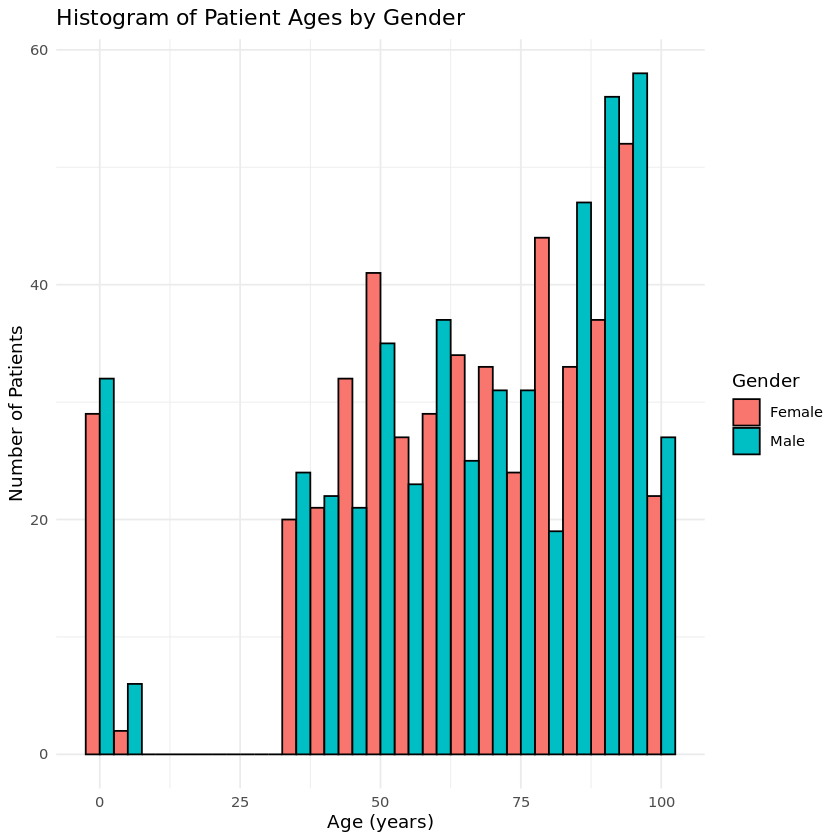

In [21]:
library(dplyr)
library(lubridate)
library(ggplot2)

# Step 1: Compute AGE in years and convert gender to labels
joined_df <- joined_df %>%
  filter(!is.na(BIRTHDATE), !is.na(GENDER)) %>%  # remove missing values
  mutate(
    AGE = as.integer(floor(time_length(interval(BIRTHDATE, Sys.Date()), "years"))),
    GENDER = if_else(GENDER == "F", "Female",
                     if_else(GENDER == "M", "Male", NA_character_))
  )

# Step 2: Check the counts of each gender
table(joined_df$GENDER)

# Step 3: Plot histogram
ggplot(joined_df, aes(x = AGE, fill = GENDER)) +
  geom_histogram(binwidth = 5, position = "dodge", color = "black") +
  labs(
    title = "Histogram of Patient Ages by Gender",
    x = "Age (years)",
    y = "Number of Patients",
    fill = "Gender"
  ) +
  theme_minimal()


### Question 12
Make a scatterplot of birthdate by martial status.

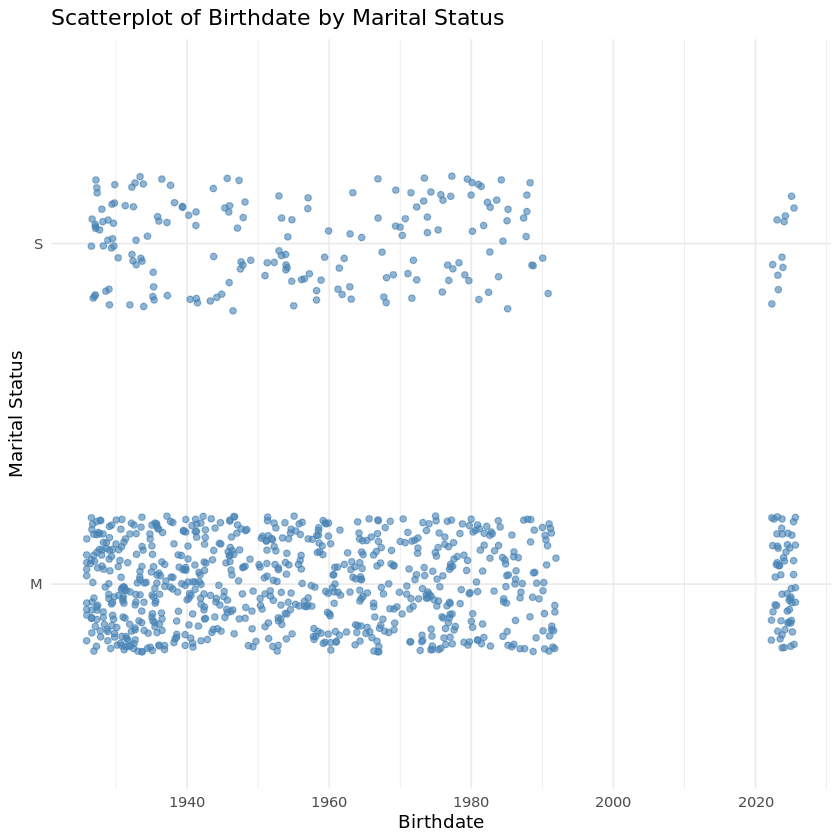

In [22]:
library(ggplot2)
library(dplyr)

# Make sure there are no missing values in BIRTHDATE or MARITAL
joined_df_clean <- joined_df %>%
  filter(!is.na(BIRTHDATE), !is.na(MARITAL))

# Scatterplot
ggplot(joined_df_clean, aes(x = BIRTHDATE, y = MARITAL)) +
  geom_jitter(width = 0, height = 0.2, alpha = 0.6, color = "steelblue") +
  labs(
    title = "Scatterplot of Birthdate by Marital Status",
    x = "Birthdate",
    y = "Marital Status"
  ) +
  theme_minimal()
